In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('income.csv.xls')

In [3]:
df.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [6]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
std=MinMaxScaler()
x=std.fit(df[['Income($)']])

In [11]:
x['Income($)']=std.transform(df[['Income($)']])

TypeError: 'MinMaxScaler' object does not support item assignment

In [ ]:
x=pd.DataFrame(x)
type(x)

In [8]:

x=x.iloc[:,1:]

NameError: name 'x' is not defined

In [25]:
std.fit(df[['Age']])
x['Age']=std.transform(df[['Age']])

In [26]:
x.head()

,Income($),Age
0,0.213675,0.058824
1,0.384615,0.176471
2,0.136752,0.176471
3,0.128205,0.117647
4,0.897436,0.941176


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


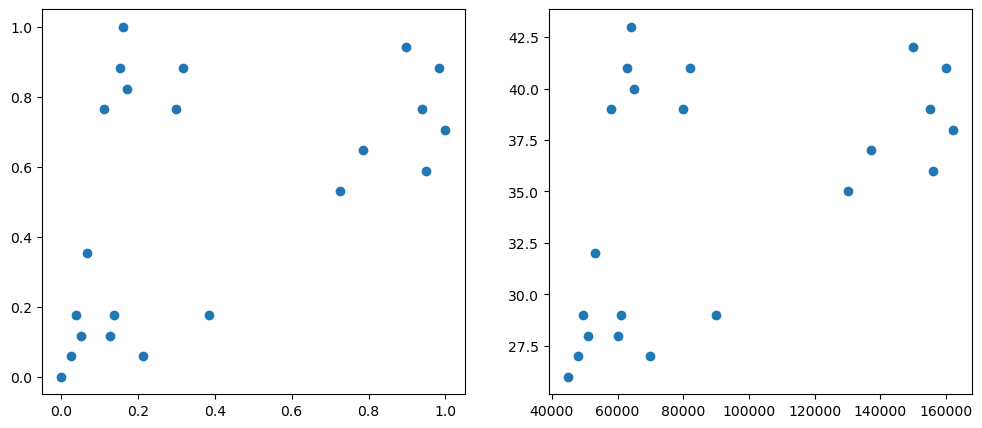

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(data=x,x='Income($)',y='Age')
ax2.scatter(data=df,x='Income($)',y='Age')

In [38]:
from sklearn.cluster import KMeans

In [41]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(x)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\raj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
x['cluster']=y_predict

In [44]:
x.head()

,Income($),Age,cluster
0,0.213675,0.058824,1
1,0.384615,0.176471,1
2,0.136752,0.176471,1
3,0.128205,0.117647,1
4,0.897436,0.941176,2


In [45]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [46]:
x['name']=df['Name']

In [49]:
x.head()

,cluster,name,Age,Income($)
0,1,Rob,0.058824,0.213675
1,1,Michael,0.176471,0.384615
2,1,Mohan,0.176471,0.136752
3,1,Ismail,0.117647,0.128205
4,2,Kory,0.941176,0.897436


In [52]:
x.head()
x=x.iloc[:,[2,3,0]]

In [53]:
x.iloc[:,0:].groupby(x.cluster).mean()

,Age,Income($),cluster
cluster,,,
0,0.852941,0.202279,0.0
1,0.137255,0.116334,1.0
2,0.722689,0.897436,2.0
